$e^{\frac{\left\Vert x_i - x_j \right\Vert^2}{2\sigma ^2}}$

$exp{(\frac{\left\Vert x_i - x_j \right\Vert^2}{2\sigma ^2})}$

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting libraries
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm

# scikit-learn
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

In [2]:
random_seed = 42
plt.style.use('dark_background')

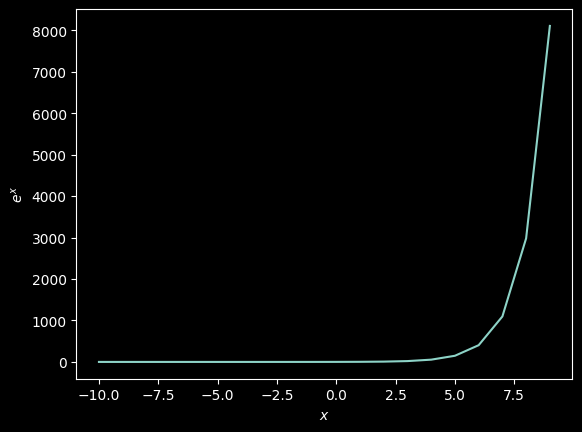

In [3]:
x = np.arange(-10, 10, 1, dtype=int)
plt.plot(x, np.exp(x))
plt.xlabel('$x$')
plt.ylabel('$e^x$')
plt.show()

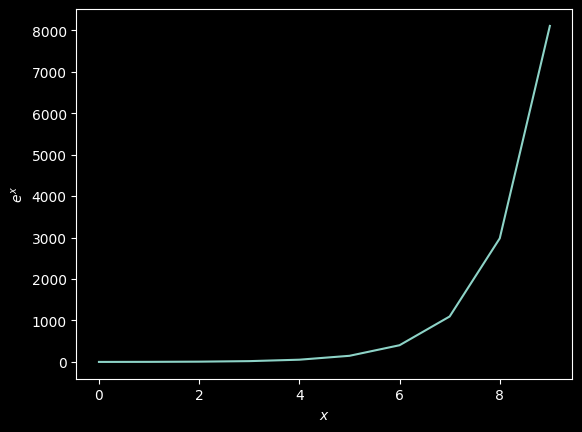

In [4]:
x = np.arange(0, 10, 1, dtype=int)
plt.plot(x, np.exp(x))
plt.xlabel('$x$')
plt.ylabel('$e^x$')
plt.show()

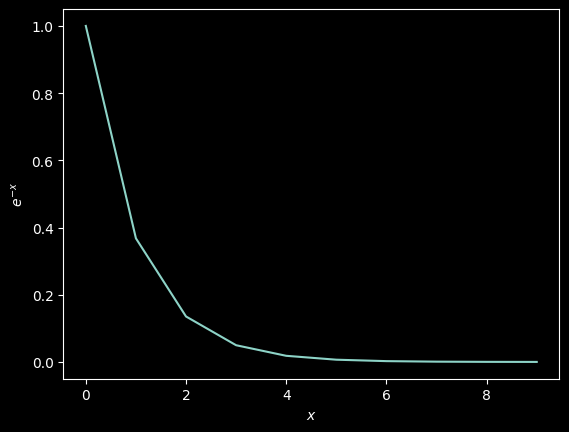

In [5]:
x = np.arange(0, 10, 1, dtype=int)
plt.plot(x, np.exp(-x))
plt.xlabel('$x$')
plt.ylabel('$e^{-x}$')
plt.show()

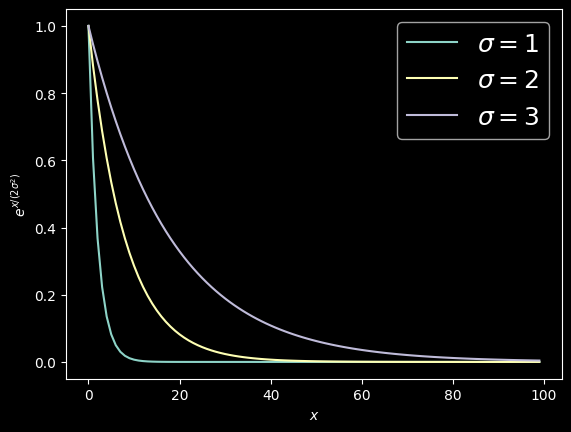

In [6]:
x = np.arange(0, 100, 1, dtype=int)
for i in [1,2,3]:
  y = np.exp(-x/(2*(i**2)))
  plt.plot(x, y, label='$\sigma=$'+str(i))

plt.legend(fontsize = 18)
plt.xlabel('$x$')
plt.ylabel('$e^{x/{(2\sigma ^2)}}$')
plt.show()

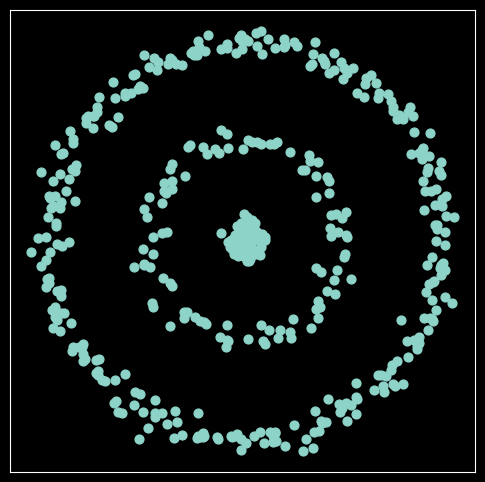

In [7]:
X, y = make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=0.15, random_state=random_seed)
# center at the origin
X = X - np.mean(X, axis=0)

X1, y1 = make_circles(n_samples=(300, 100), noise=0.04, factor=0.5, random_state=random_seed)
# add 1 to (make_circles) labels to account for (make_blobs) label
y1 = y1 + 1
# increase the radius
X1 = X1*3

X = np.concatenate((X, X1), axis=0)
y = np.concatenate((y, y1), axis=0)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], marker='o', s=40)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [8]:
A = np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1)
A_exp = np.exp(-1*A)
print(A.shape)

(500, 500)


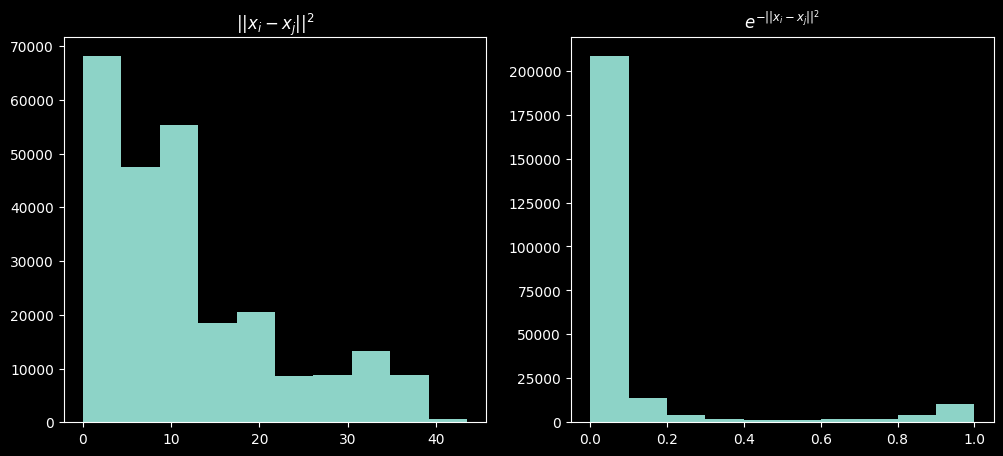

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].hist(A.flatten())
axs[0].set_title('$||x_i - x_j||^2$')
axs[1].hist(A_exp.flatten())
axs[1].set_title('$e^{-||x_i - x_j||^2}$')
plt.show()

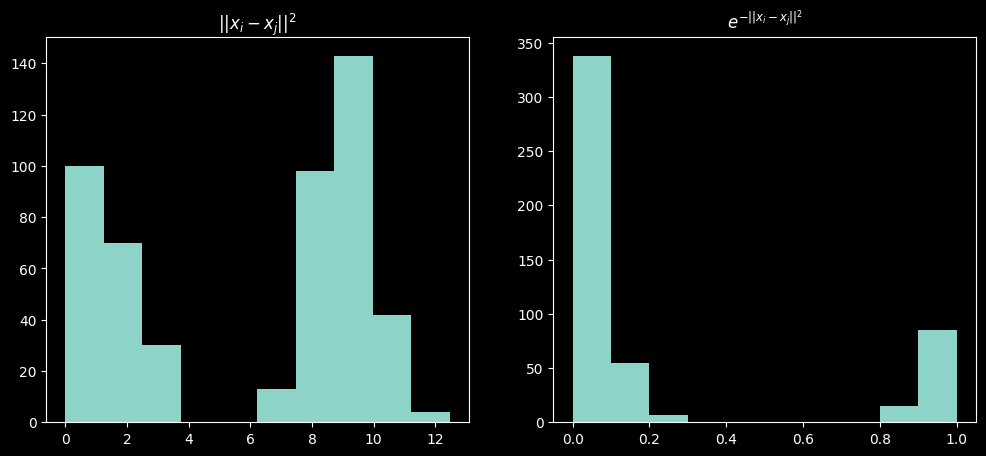

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].hist(A[0,:])
axs[0].set_title('$||x_i - x_j||^2$')
axs[1].hist(A_exp[0,:])
axs[1].set_title('$e^{-||x_i - x_j||^2}$')
plt.show()

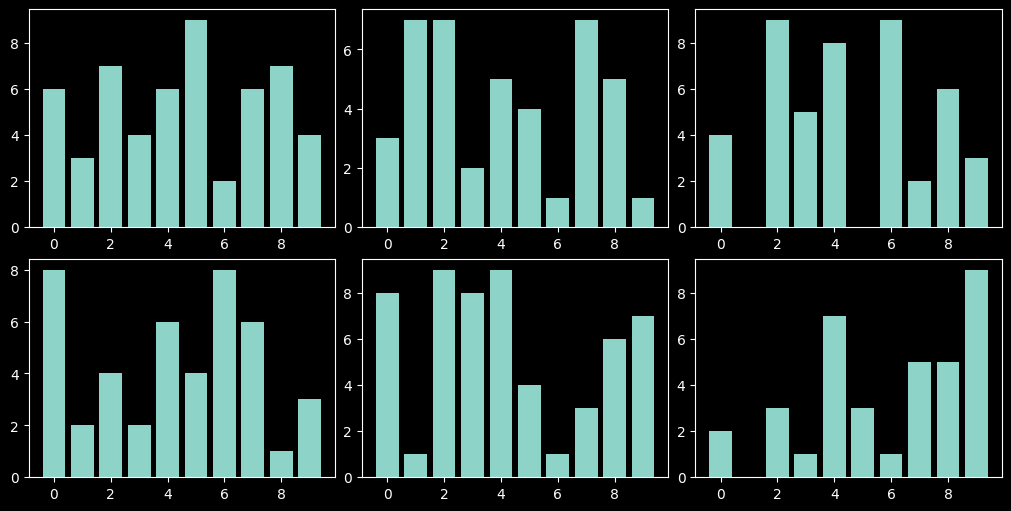

In [11]:
np.random.seed(random_seed)
x = np.random.randint(10, size=(6, 10))

fig, axs = plt.subplots(2, 3, figsize=(10, 5), layout="constrained")
for i, ax in enumerate(axs.ravel()):
    ax.bar(np.arange(10), x[i,:])

plt.show()

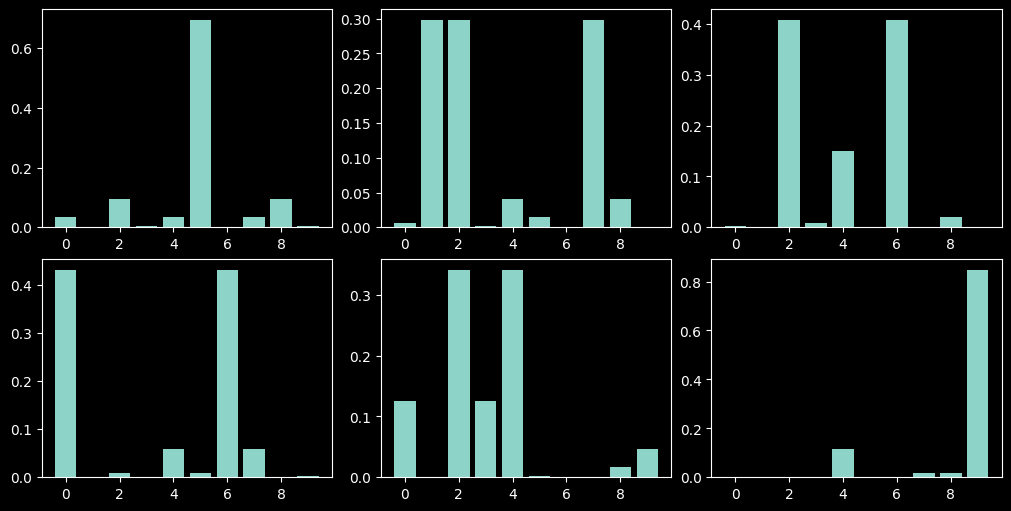

In [12]:
x_exp = np.exp(x) / np.expand_dims(np.sum(np.exp(x), axis=1), axis=1)

fig, axs = plt.subplots(2, 3, figsize=(10, 5), layout="constrained")
for i, ax in enumerate(axs.ravel()):
    ax.bar(np.arange(10), x_exp[i,:])

plt.show()

In [19]:
print(x_exp)

import torch
from torch import nn

m = nn.Softmax(dim=1)
print(m(torch.from_numpy(x).float()))


[[3.46489855e-02 1.72507141e-03 9.41857077e-02 4.68923027e-03
  3.46489855e-02 6.95943478e-01 6.34618306e-04 3.46489855e-02
  9.41857077e-02 4.68923027e-03]
 [5.46659002e-03 2.98465702e-01 2.98465702e-01 2.01104608e-03
  4.03929403e-02 1.48597323e-02 7.39822508e-04 2.98465702e-01
  4.03929403e-02 7.39822508e-04]
 [2.75427727e-03 5.04463479e-05 4.08770991e-01 7.48690186e-03
  1.50378444e-01 5.04463479e-05 4.08770991e-01 3.72750895e-04
  2.03515093e-02 1.01324198e-03]
 [4.31051357e-01 1.06846949e-03 7.89498100e-03 1.06846949e-03
  5.83364575e-02 7.89498100e-03 4.31051357e-01 5.83364575e-02
  3.93067959e-04 2.90440120e-03]
 [1.25523185e-01 1.14462329e-04 3.41207392e-01 1.25523185e-01
  3.41207392e-01 2.29903733e-03 1.14462329e-04 8.45768567e-04
  1.69877158e-02 4.61773991e-02]
 [7.73679396e-04 1.04706120e-04 2.10307864e-03 2.84620744e-04
  1.14824203e-01 2.10307864e-03 2.84620744e-04 1.55397661e-02
  1.55397661e-02 8.48442480e-01]]
tensor([[3.4649e-02, 1.7251e-03, 9.4186e-02, 4.6892e-03, 